In [ ]:
import cv2
import os
from os import listdir
import zipfile
import gdown
import numpy as np

import random
from IPython.display import Image, display
from ipywidgets import HBox


from google.colab.patches import cv2_imshow

In [ ]:
# load, split and scale the maps dataset ready for training
from numpy import asarray, vstack, savez_compressed
from keras.utils import img_to_array, load_img

In [ ]:
## Drive path
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


train
 - real
 - cartoon

val
 - real
 - cartoon

In [ ]:
# Path to the dataset
train = "/content/gdrive/MyDrive/Colab Notebooks/aivancity/Computer Vision/dataset/celeb_gan/train/"

val = "/content/gdrive/MyDrive/Colab Notebooks/aivancity/Computer Vision/dataset/celeb_gan/val/"

# Load the image file names from the dataset folder
train_real_files = os.listdir(train + "/real/")
train_cartoon_files = os.listdir(train + "/cartoon/")
val_real_files = os.listdir(val + "/real/")
val_cartoon_files = os.listdir(val + "/cartoon/")

# image_files = image_files[:100]  ### slice the number of images you want
print(f"Number of train real images {len(train_real_files)}")
print(f"Number of train cartoon images {len(train_cartoon_files)}")
print(f"Number of val real images {len(val_real_files)}")
print(f"Number of val cartoon images {len(val_cartoon_files)}")

Number of train real images 2001
Number of train cartoon images 2001
Number of val real images 1000
Number of val cartoon images 1000


In [ ]:
train_real_files

### Show images

Showing train dataset samples


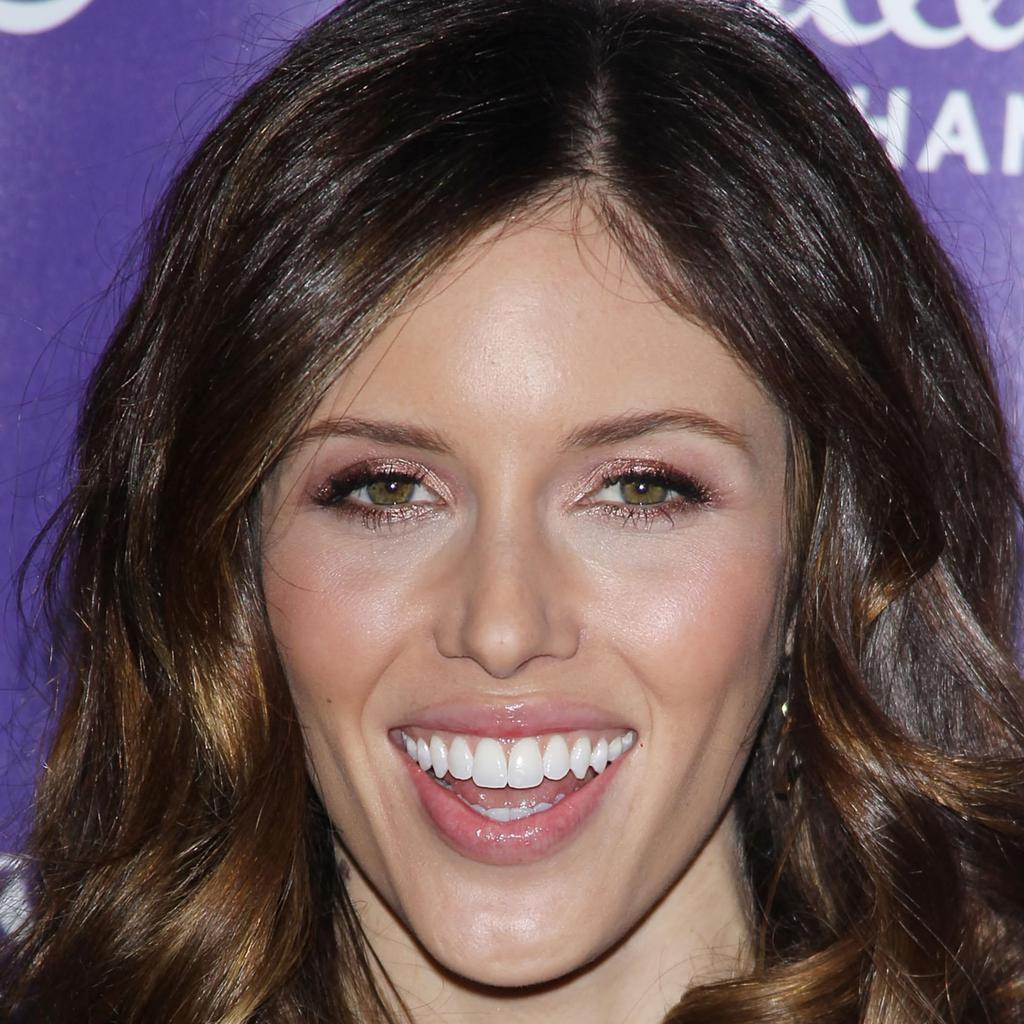

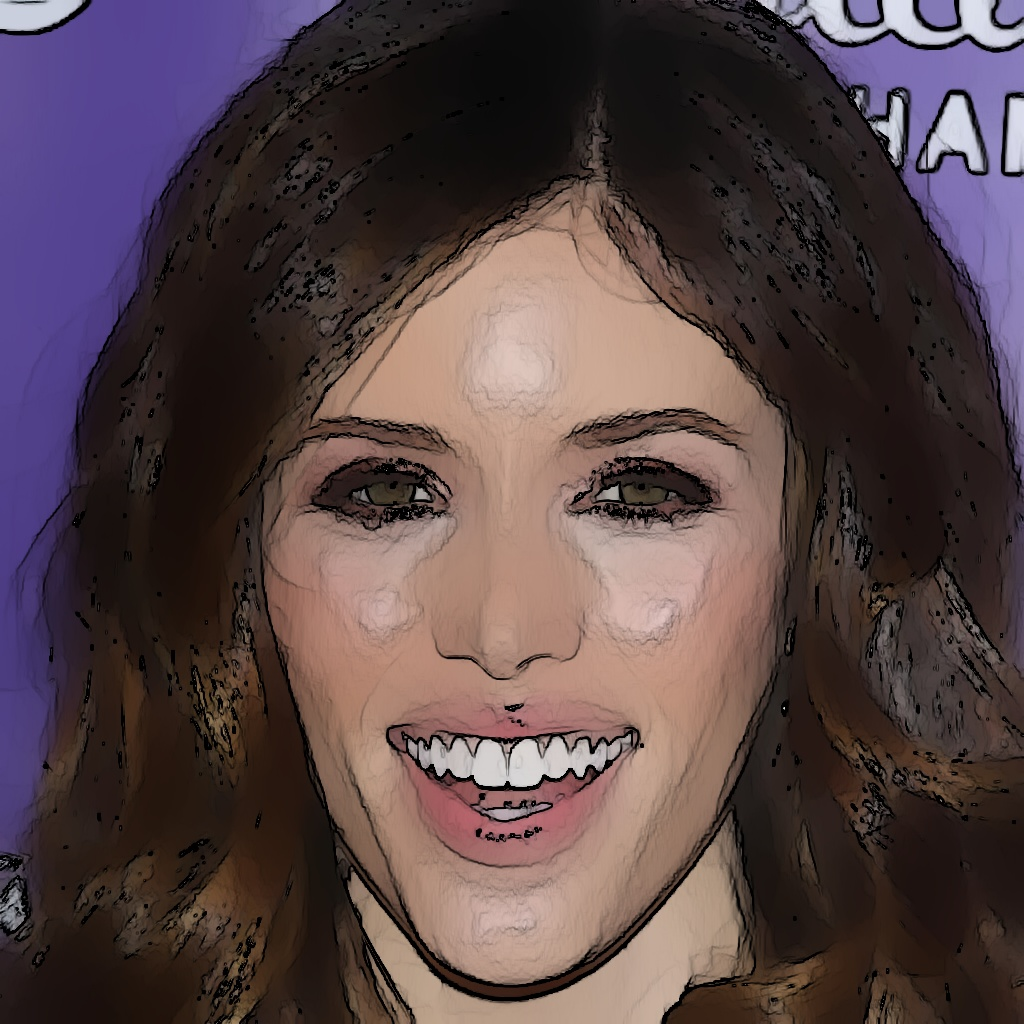

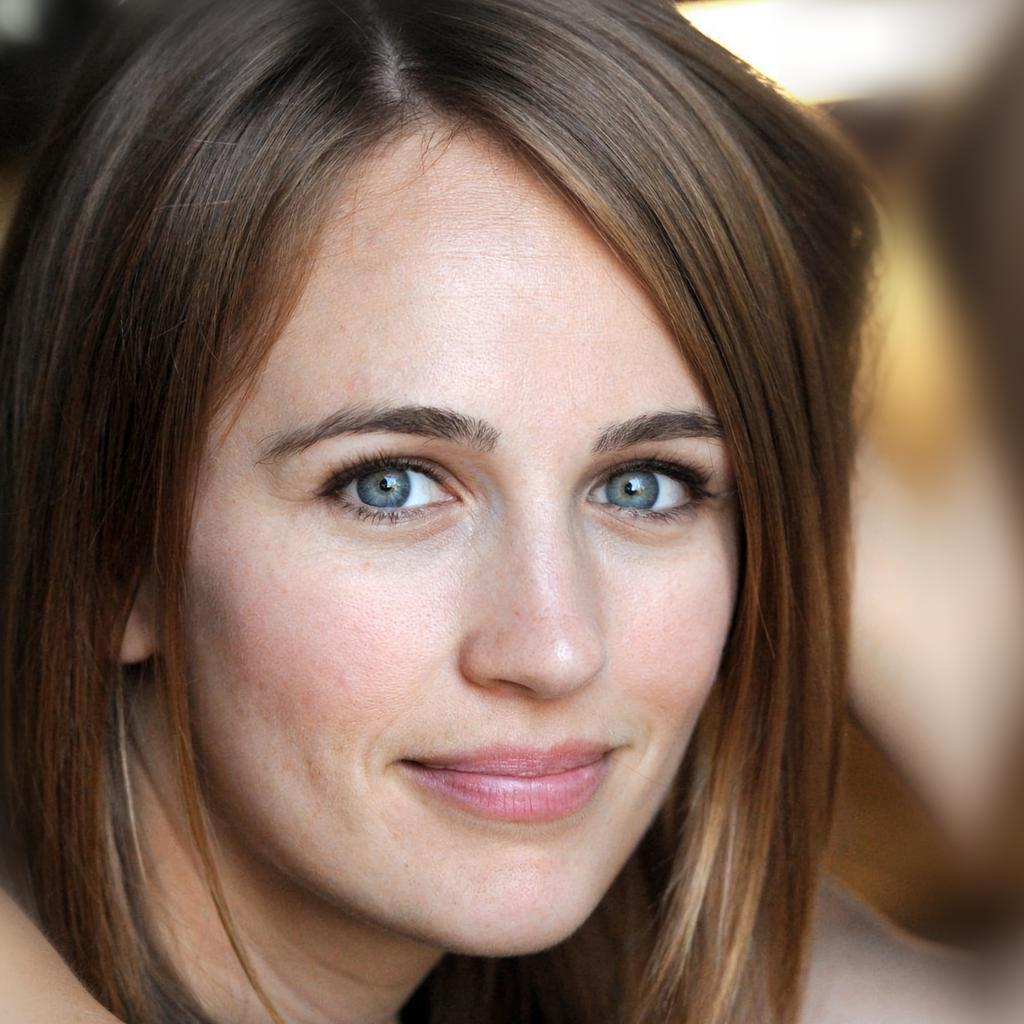

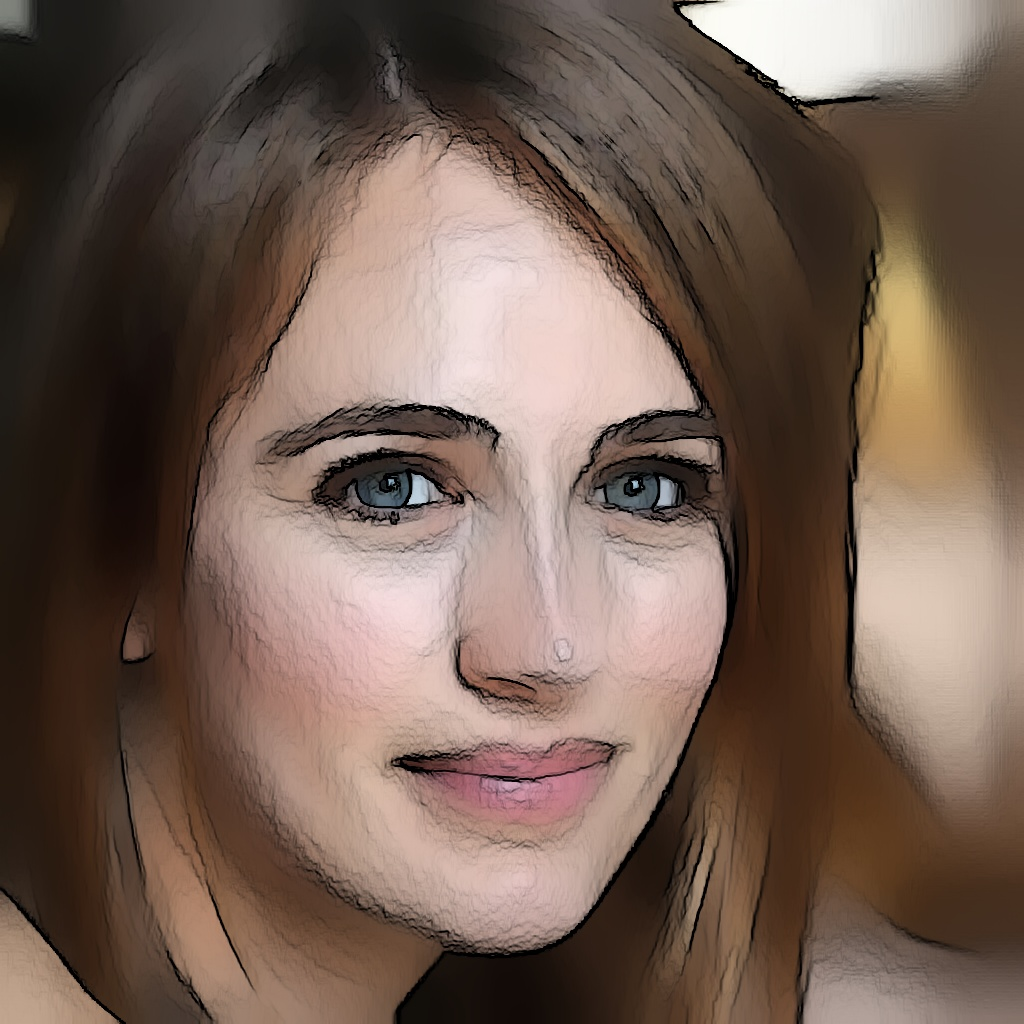

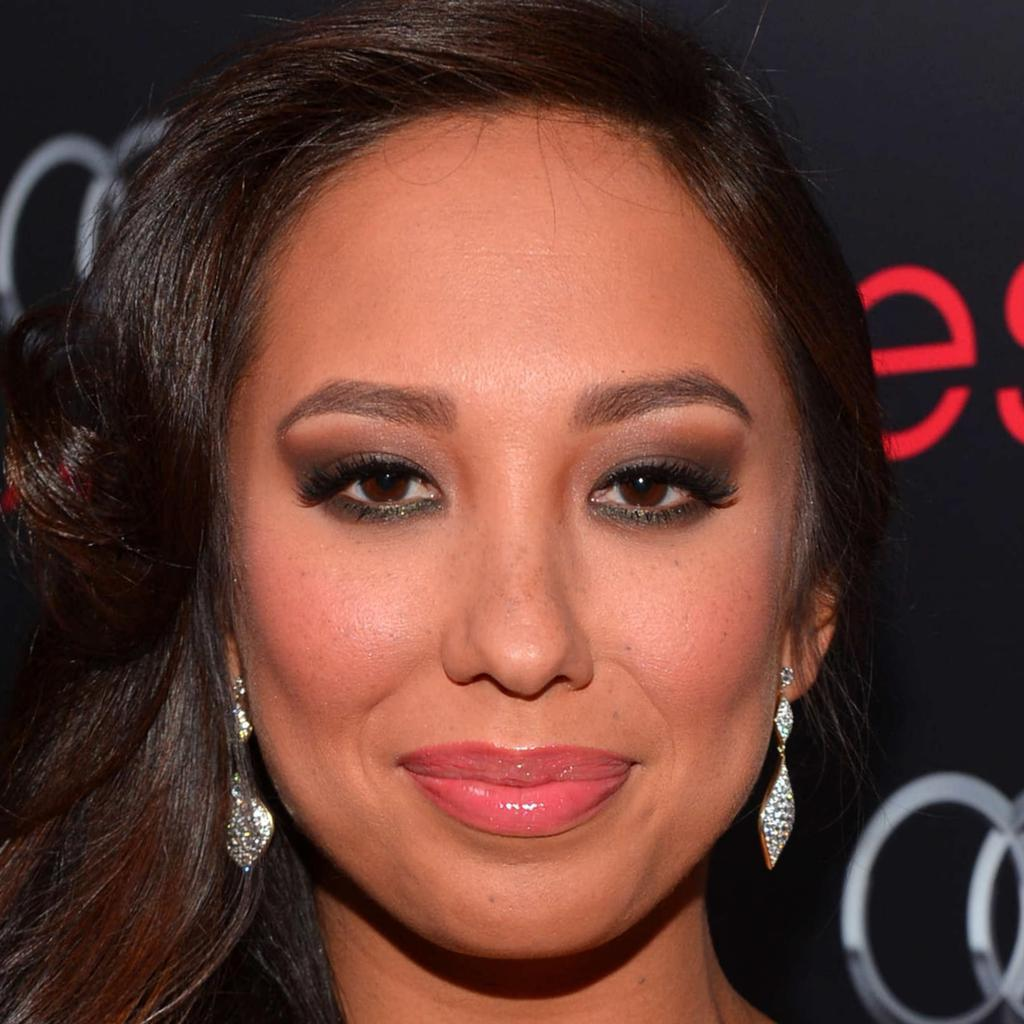

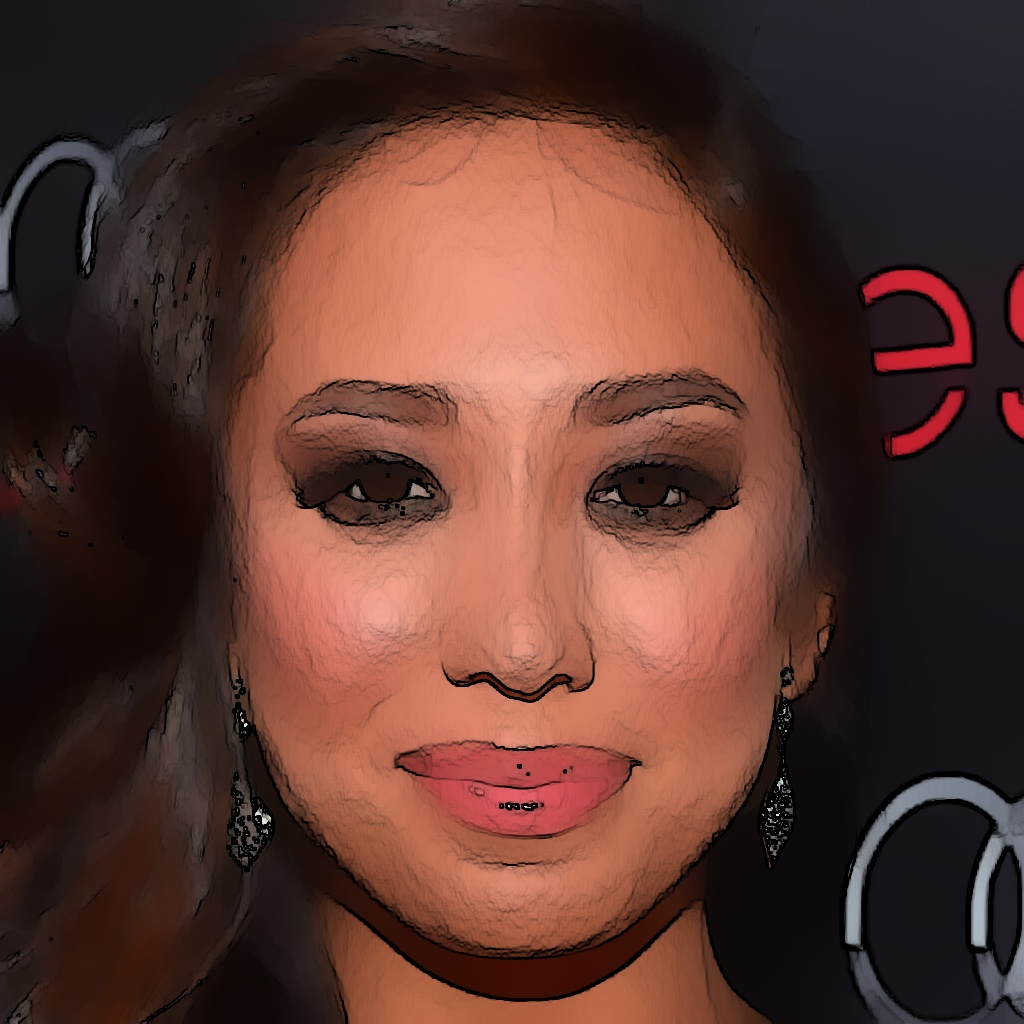


Showing val dataset samples


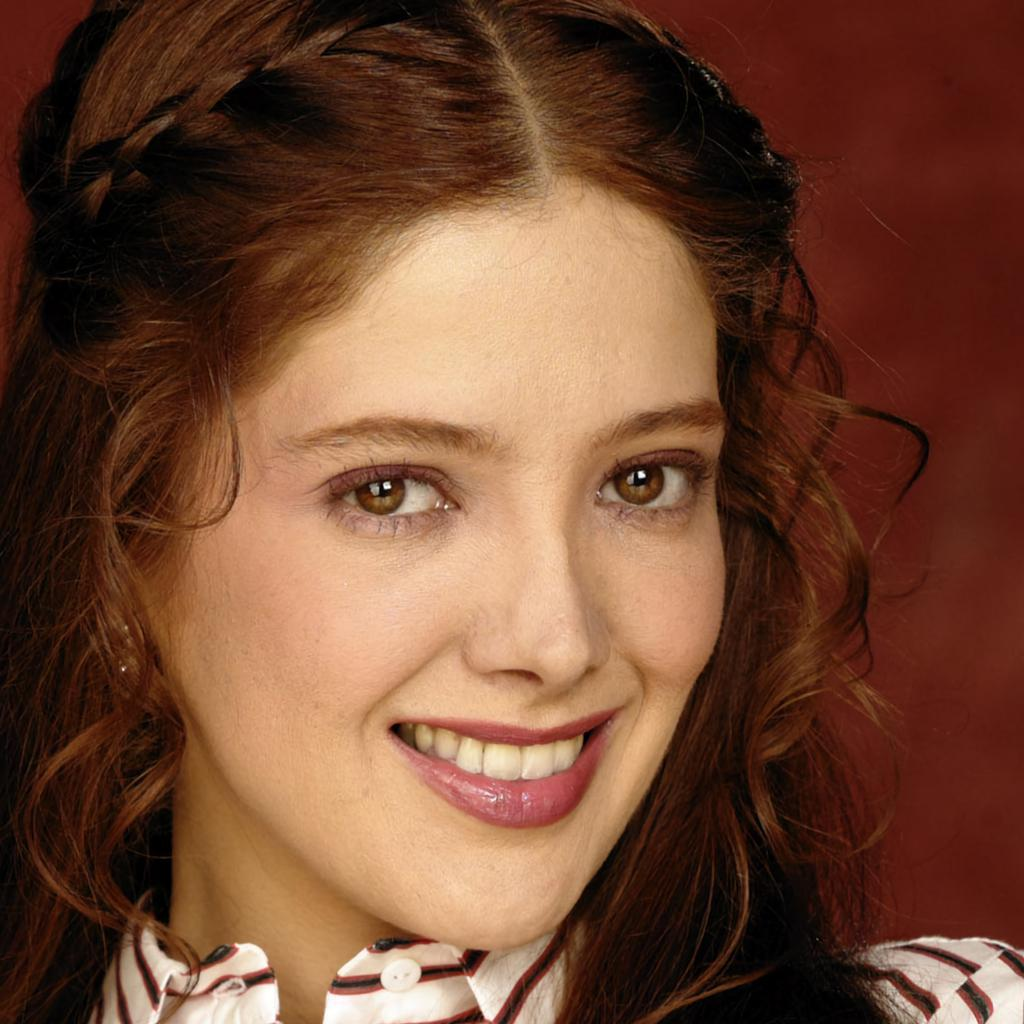

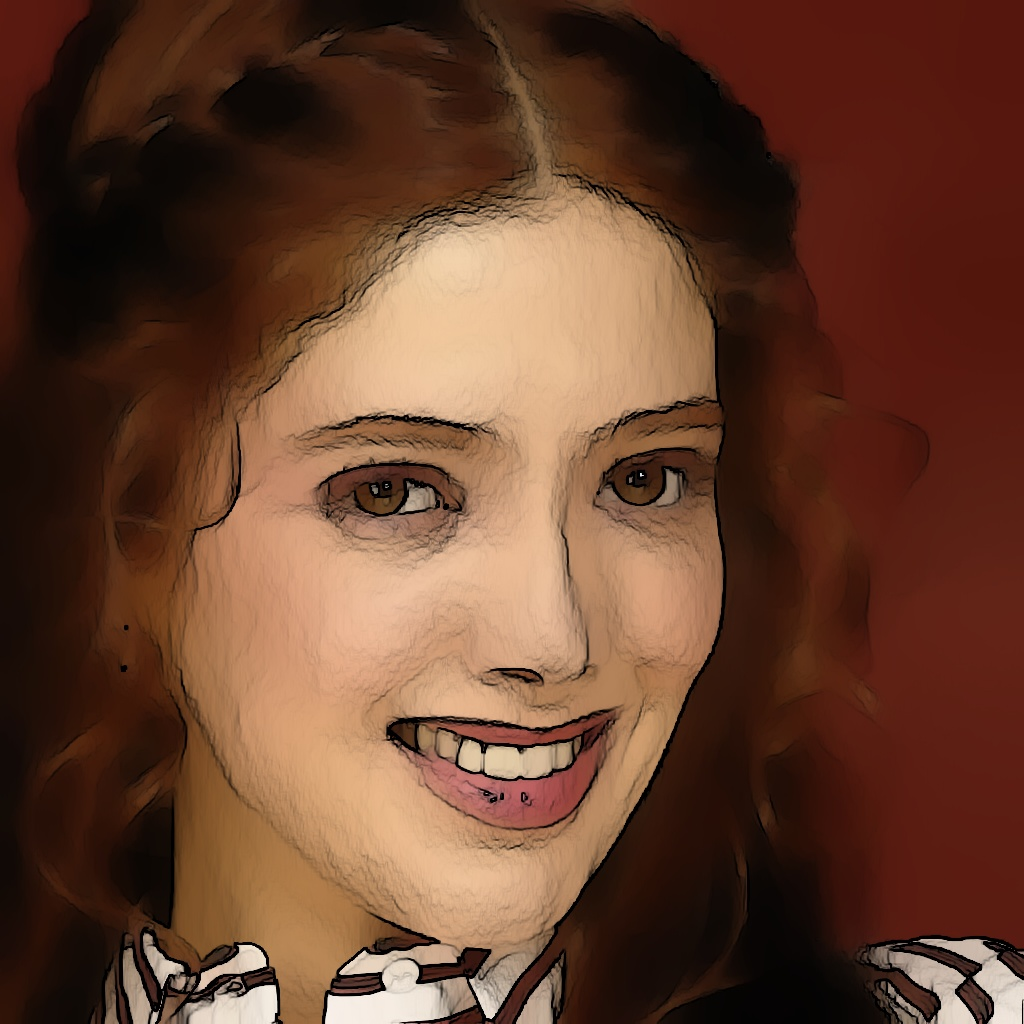

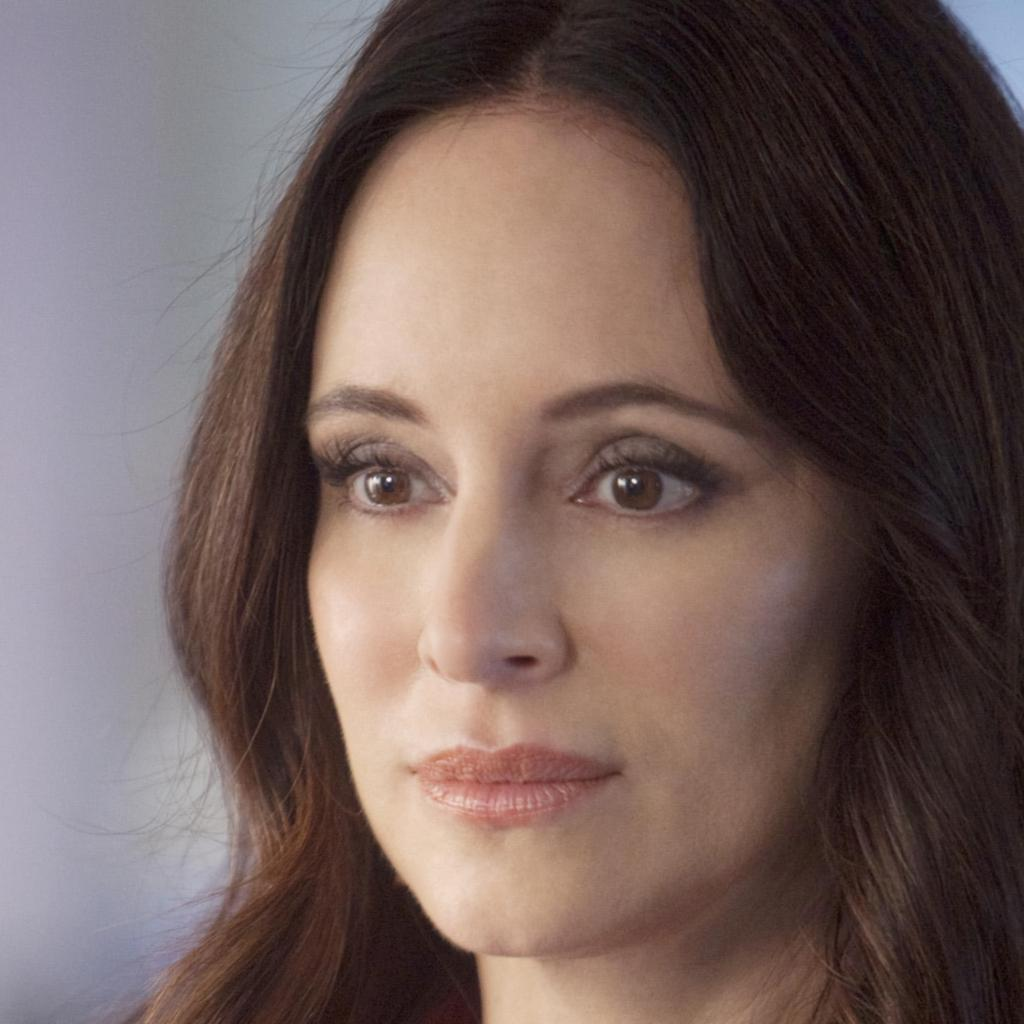

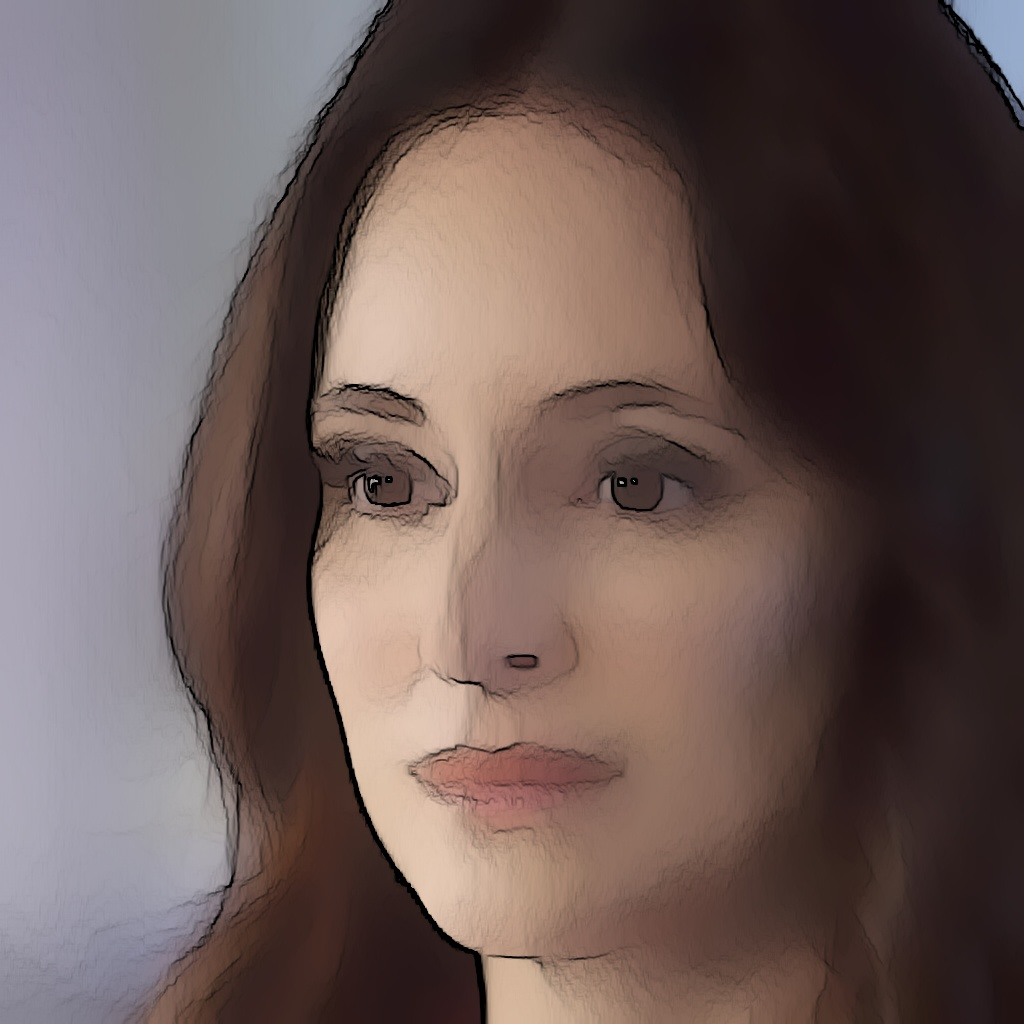

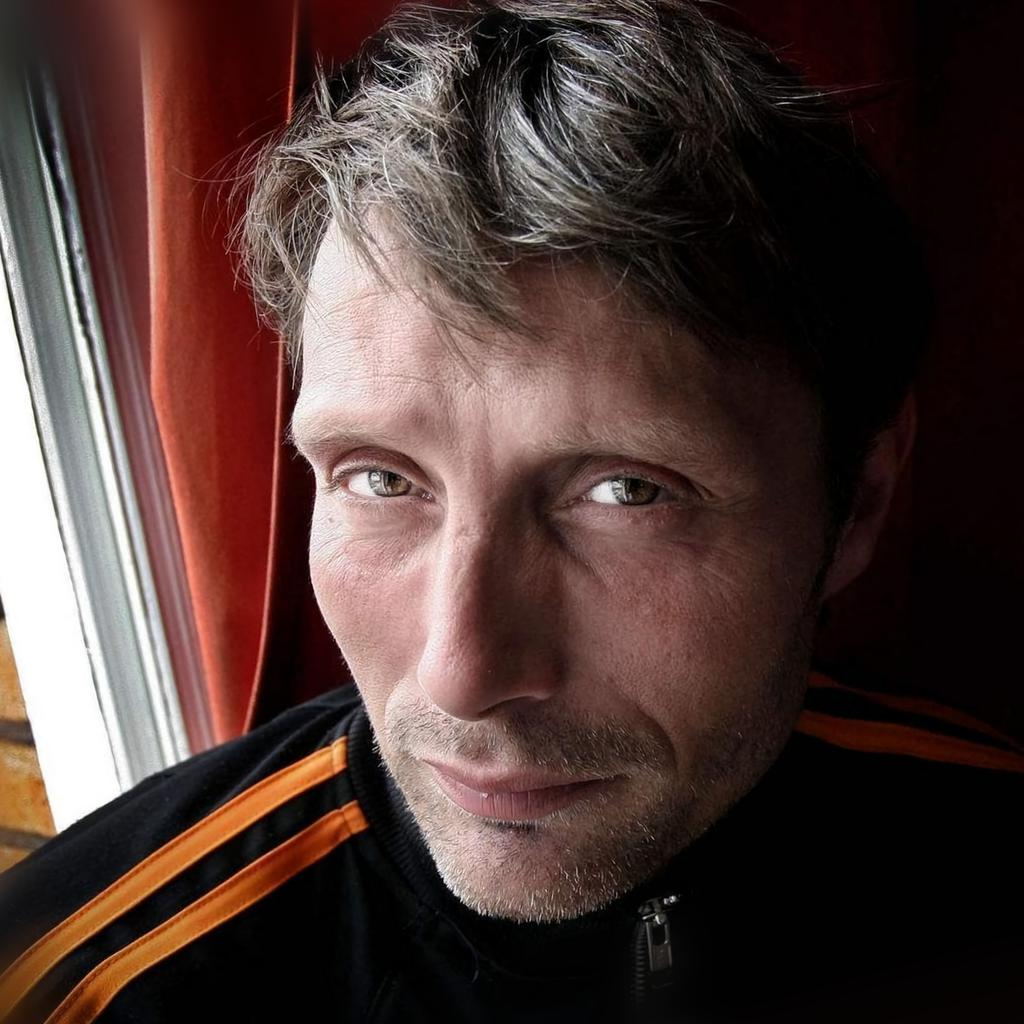

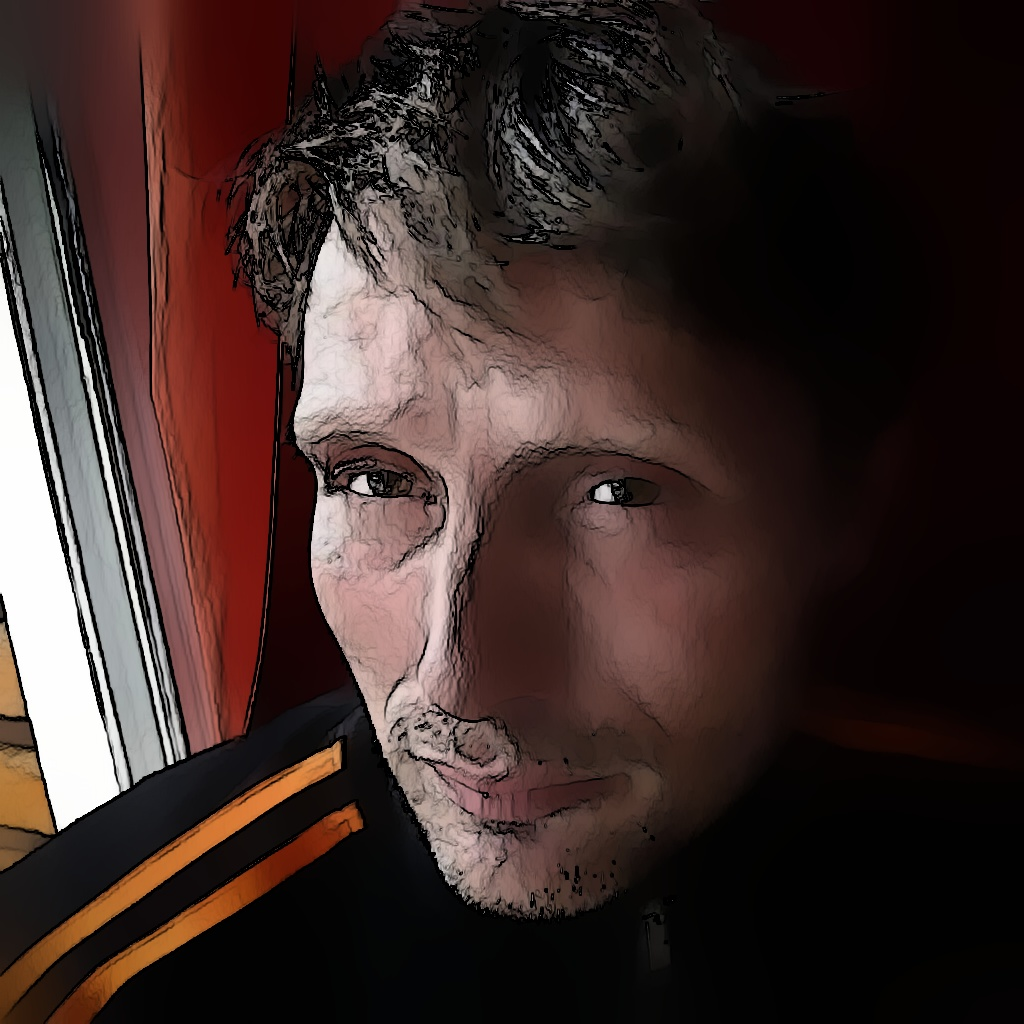

In [ ]:


# Number of images to display
n = 3

random_images = random.sample(train_cartoon_files, n)
width=300
height=200

print(f"Showing train dataset samples")
for image in random_images:
  display(Image(filename= f"{train}/real/{image}", width=width, height=height))
  display(Image(filename= f"{train}/cartoon/{image}", width=width, height=height))

random_images = random.sample(val_cartoon_files, n)
print(f"\nShowing val dataset samples")
for image in random_images:
  display(Image(filename= f"{val}/real/{image}", width=width, height=height))
  display(Image(filename= f"{val}/cartoon/{image}", width=width, height=height))


In [ ]:

# load all images in a directory into memory
def load_images(path, size=(256, 256)):
  img_list = list()

  # enumerate filenames in directory, assume all are images
  for filename in sorted(listdir(path)):
    # load and resize the image
    pixels = load_img(path + filename, target_size=size)
    # convert to numpy array
    img_pixels = img_to_array(pixels)
    # # split into satellite and map
    # real_img, car_img = pixels[:, :256], pixels[:, 256:]
    img_list.append(img_pixels)
    
  return asarray(img_list)
 


Running the code below loads all images in the training dataset, summarizes their shape to ensure the images were loaded correctly, then saves the arrays to a new file called celebs_256.npz in compressed NumPy array format.

---

This file can be loaded later via the load() NumPy function and retrieving each array in turn.

In [ ]:
# dataset path
train_real_path = train + 'real/'
train_cartoon_path = train + 'cartoon/'

# load dataset
real_images = load_images(train_real_path)
cartoon_images = load_images(train_cartoon_path)
print('Loaded: ', real_images.shape, cartoon_images.shape)

# Path to save the prepared_img dataset
prepared_img = "/content/gdrive/MyDrive/Colab Notebooks/aivancity/Computer Vision/dataset/celeb_gan/celeb_256.npz"

# save as compressed numpy array
# filename = 'celeb_256.npz'
savez_compressed(prepared_img, real_images, cartoon_images)
print('Saved dataset: ', prepared_img)

Loaded:  (2001, 256, 256, 3) (2001, 256, 256, 3)
Saved dataset:  /content/gdrive/MyDrive/Colab Notebooks/aivancity/Computer Vision/dataset/celeb_gan/celeb_256.npz



We can load the prepared dataset and summarize the shape of each array, confirming our expectations of a  set of 256×256 image pairs.

In [ ]:
# load the prepared dataset
from numpy import load

# load the dataset
data = load(prepared_img)
real_images, cartoon_images = data['arr_0'], data['arr_1']
print('Loaded: ', real_images.shape, cartoon_images.shape)


Loaded:  (2001, 256, 256, 3) (2001, 256, 256, 3)


We can then plot some images pairs to confirm the data has been handled correctly.

A plot of 3 image pairs is also created showing the real images on the top and cartoon images on the bottom.



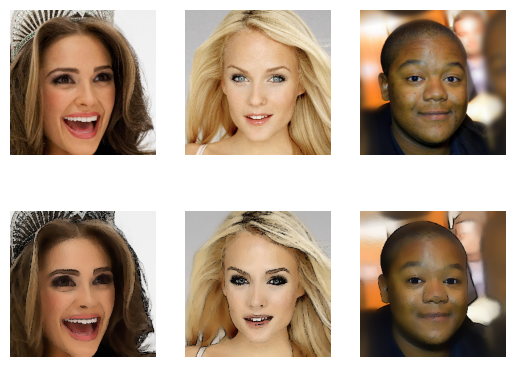

In [ ]:
from matplotlib import pyplot

# plot real images
n_samples = 3
for i in range(n_samples):
 pyplot.subplot(2, n_samples, 1 + i)
 pyplot.axis('off')
 pyplot.imshow(real_images[i].astype('uint8'))

# plot cartoon image
for i in range(n_samples):
 pyplot.subplot(2, n_samples, 1 + n_samples + i)
 pyplot.axis('off')
 pyplot.imshow(cartoon_images[i].astype('uint8'))

pyplot.show()